In [1]:
import os
import pandas as pd
os.chdir('../scripts/')
import utils as util
import text_anlaysis_utils as text_util
import plot

[nltk_data] Downloading package stopwords to /home/musse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/musse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/musse/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
os.chdir('../scripts/')
all_data_path = '../data/sentiment _analysis/raw_analyst_ratings.csv'
df = util.read_csv_file(all_data_path)

In [3]:
df = df.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


EDA

In [4]:
df.shape

(1407328, 5)

In [5]:
df['stock'].unique()

array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'],
      shape=(6204,), dtype=object)

In [6]:
df['publisher'].unique

<bound method Series.unique of 0          Benzinga Insights
1          Benzinga Insights
2                 Lisa Levin
3                 Lisa Levin
4                 Vick Meyer
                 ...        
1407323        Monica Gerson
1407324         Benjamin Lee
1407325       BenzingaStaffL
1407326            Joe Young
1407327        Allie Wickman
Name: publisher, Length: 1407328, dtype: object>

Checking for null values

In [7]:
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [8]:
df['sentiment'] = df['headline'].apply(text_util.get_sentiment)

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [10]:
df.head()

,headline,url,publisher,date,stock,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,positive


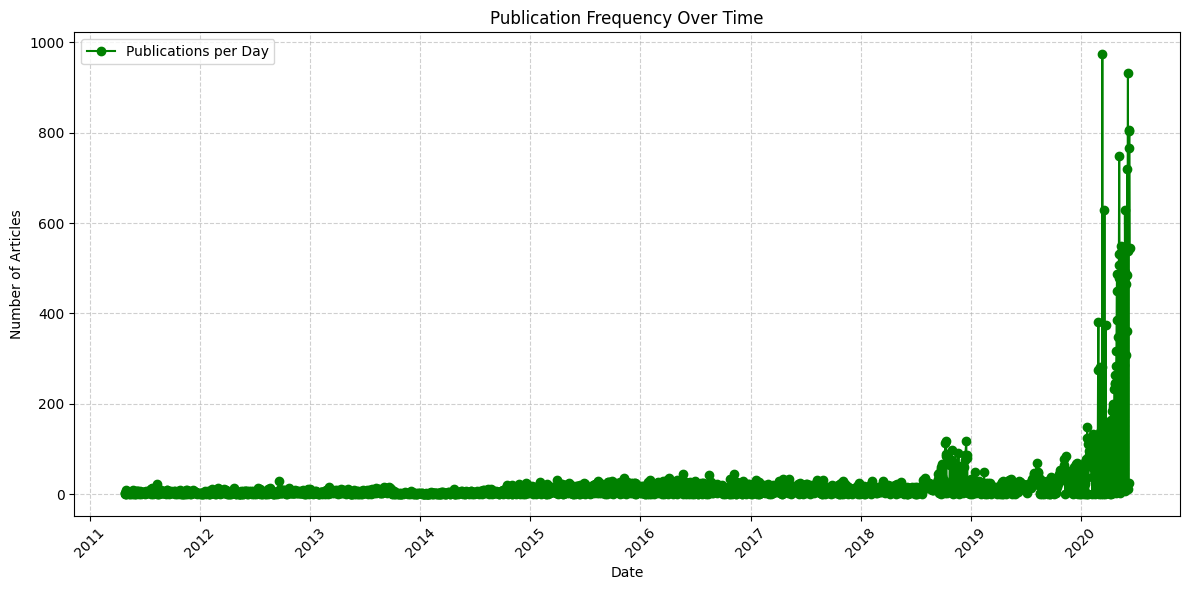

In [11]:
plot.plot_publication_frequency(df)

In [12]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
print(publisher_counts.head(10))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


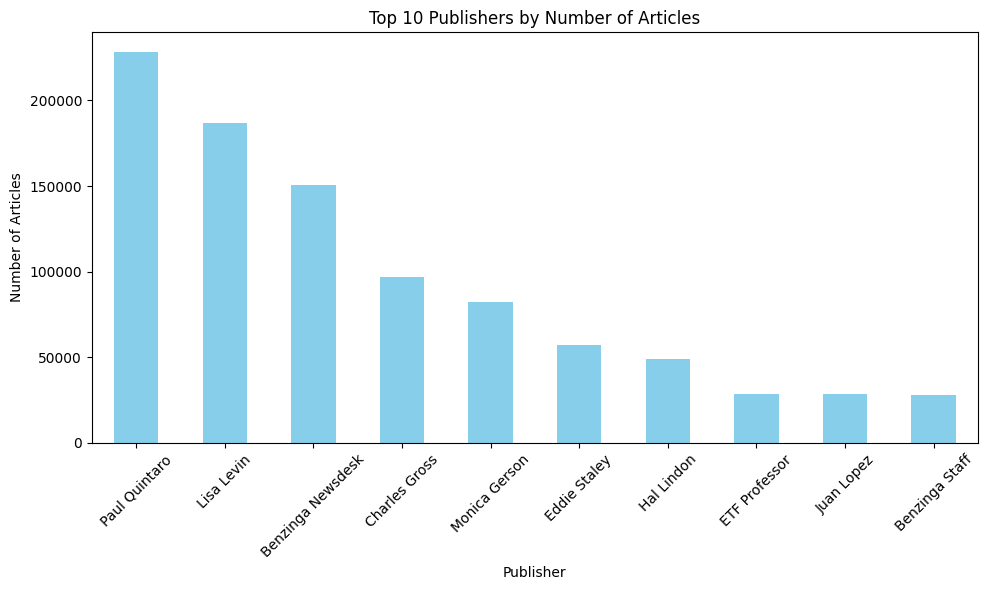

In [13]:
plot.plot_top_publishers(publisher_counts)

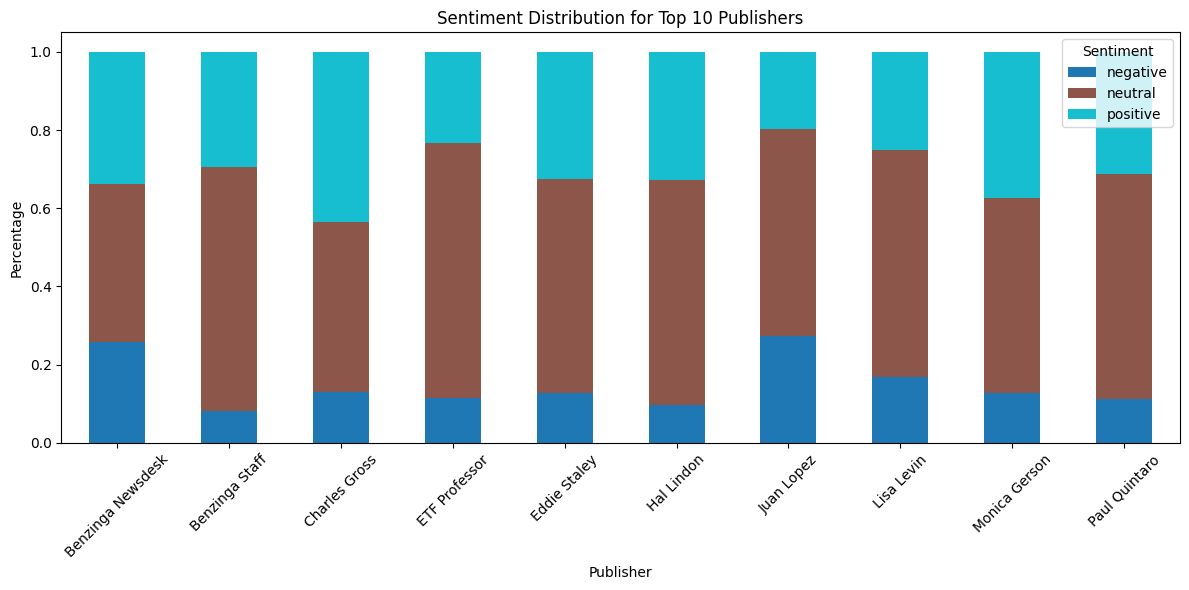

In [14]:
plot.plot_sentiment_by_publisher(df, publisher_column='publisher', sentiment_column='sentiment', top_n=10)